## Artificial Neural Network

- Perceptron with Linear Activation and Sigmoid Activation for Binary Classification

화수목
- Loss function, Cost function, objective function
- Activation function
- Gradient Descent
- Backpropagation
- Optimizer
- traning vs loss graph (tensorboard, tf pg)
- Over fitting, Dropout, Reguralization
- Linear regression, Perceptron, MLP and Deep Learning
- Logistic regression ...

## Perceptron with Sigmoid Activation
---
**Inputs:**  
$$
x_1, \; x_2
$$

**Bias term:**  
$$
b
$$

**Weights:**  
$$
w_1, \; w_2
$$

**Activation function:**  
Sigmoid (logistic)  
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


### Mathematical Formulation
---
The neuron computes a weighted sum (the *logit*):
$$
z = w_1 x_1 + w_2 x_2 + b
$$

Then applies the sigmoid activation:
$$
f(x_1, x_2) = \sigma(z) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}
$$




### Computational Flow

$$
x_1, \; x_2 
\xrightarrow[]{\text{weighted sum }(w_1x_1 + w_2x_2 + b)} 
z 
\xrightarrow[]{\text{sigmoid } \sigma(z)} 
\hat{y}
$$



### Full Expression

$$
\boxed{
\hat{y} = \sigma(w_1x_1 + w_2x_2 + b)
}
$$

### Sigmoid Properties
---
$$
\sigma(z) = \frac{1}{1 + e^{-z}} 
\quad \text{maps } z \in (-\infty, +\infty) \text{ to } (0, 1)
$$

$$
\frac{d\sigma}{dz} = \sigma(z)\big(1 - \sigma(z)\big)
$$


### Interpretation
---
This neuron performs two operations:
1. Linear transformation:  
   $$z = w_1x_1 + w_2x_2 + b$$
2. Nonlinear mapping:  
   $$\hat{y} = \sigma(z)$$

The sigmoid squashes any real-valued input into a bounded interval $(0,1)$,  
allowing the output to be interpreted as a probability.


---

### Nework Graph


```text
x1 ──►( w1 )──┐
              (*)──► (+) ──► z = (w1 * x1 + w2 * x2 + b) ──► sigmoid(z) ──► ŷ
x2 ──►( w2 )──┘
                      ▲
                      │
                    bias b
```
---

In [37]:
import numpy as np


# Input combinations
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

labels = {
    "AND": np.array([0,0,0,1]),
    "OR":  np.array([0,1,1,1]),
    "XOR": np.array([0,1,1,0])
}

# w1, w2, b
gates = {
    # "AND": (5, 5, -7.5),
    "AND": (8, 8, -8.0),
    "OR":  (5, 5, -2.5),
    # "XOR": (5, 5, -5.0),
    "XOR": (8, 8, -16.0)

}

# Linear activation (no nonlinearity)
def linear(z):
    return z

# Perceptron with linear activation
def weighted_sum(x1, x2, w1, w2, b):
    z = w1 * x1 + w2 * x2 + b
    return linear(z)

# Evaluate gates
for name, (w1, w2, b) in gates.items():
    print(f"\n{name} gate (Linear activation)")
    for x1, x2 in inputs:
        y_hat = weighted_sum(x1, x2, w1, w2, b)
        # Threshold manually at 0 (since we have no sigmoid)
        y_pred = 1 if y_hat > 0 else 0
        print(f"Input ({x1}, {x2}) -> linear_output={y_hat:.3f} -> Output={y_pred}")



AND gate (Linear activation)
Input (0, 0) -> linear_output=-8.000 -> Output=0
Input (0, 1) -> linear_output=0.000 -> Output=0
Input (1, 0) -> linear_output=0.000 -> Output=0
Input (1, 1) -> linear_output=8.000 -> Output=1

OR gate (Linear activation)
Input (0, 0) -> linear_output=-2.500 -> Output=0
Input (0, 1) -> linear_output=2.500 -> Output=1
Input (1, 0) -> linear_output=2.500 -> Output=1
Input (1, 1) -> linear_output=7.500 -> Output=1

XOR gate (Linear activation)
Input (0, 0) -> linear_output=-16.000 -> Output=0
Input (0, 1) -> linear_output=-8.000 -> Output=0
Input (1, 0) -> linear_output=-8.000 -> Output=0
Input (1, 1) -> linear_output=0.000 -> Output=0


In [38]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Perceptron output
def weighted_sum(x1, x2, w1, w2, b):
    z = w1 * x1 + w2 * x2 + b
    return sigmoid(z)

# Input combinations
inputs = inputs
labels = labels

# same settings, w1, w2, b
gates = gates

# Evaluate gates
for name, (w1, w2, b) in gates.items():
    print(f"\n{name} gate")
    for x1, x2 in inputs:
        y_hat = weighted_sum(x1, x2, w1, w2, b)
        y_pred = 1 if y_hat > 0.5 else 0
        print(f"Input ({x1}, {x2}) -> sigmoid={y_hat:.3f} -> Output={y_pred}")



AND gate
Input (0, 0) -> sigmoid=0.000 -> Output=0
Input (0, 1) -> sigmoid=0.500 -> Output=0
Input (1, 0) -> sigmoid=0.500 -> Output=0
Input (1, 1) -> sigmoid=1.000 -> Output=1

OR gate
Input (0, 0) -> sigmoid=0.076 -> Output=0
Input (0, 1) -> sigmoid=0.924 -> Output=1
Input (1, 0) -> sigmoid=0.924 -> Output=1
Input (1, 1) -> sigmoid=0.999 -> Output=1

XOR gate
Input (0, 0) -> sigmoid=0.000 -> Output=0
Input (0, 1) -> sigmoid=0.000 -> Output=0
Input (1, 0) -> sigmoid=0.000 -> Output=0
Input (1, 1) -> sigmoid=0.500 -> Output=0


#### XOR Linear activation (identity)

/var/folders/y0/xmqglxpd07bcj0th06zn09nh0000gn/T/ipykernel_56735/1629120067.py:53: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0,0.08,1,0.95])


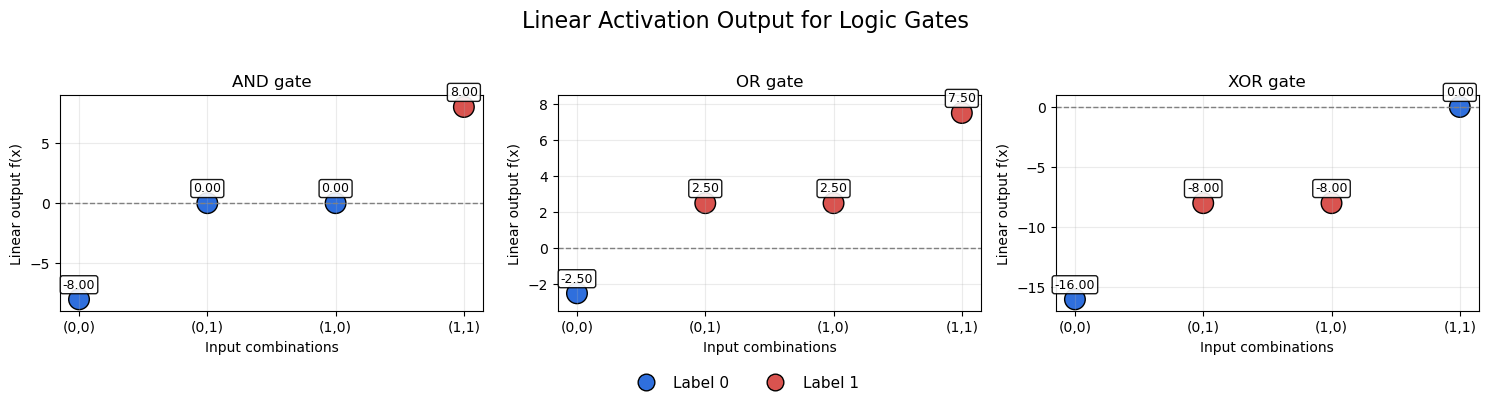

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

# Linear activation (identity)
def linear(z):
    return z

# Neuron function (no sigmoid)
def neuron(x1, x2, w1, w2, b):
    return linear(w1 * x1 + w2 * x2 + b)

# Improved Plot setup: constrained_layout, cleaner markers, legend
fig, axes = plt.subplots(1, 3, figsize=(15,4), constrained_layout=True)
fig.suptitle("Linear Activation Output for Logic Gates", fontsize=16)

# Visual style
marker_props = dict(s=220, edgecolors='k')
labels_map = {0: 'Label 0', 1: 'Label 1'}
colors = ['#2f6fdd', '#d9534f']

for ax, (name, (w1, w2, b)) in zip(axes, gates.items()):
    outputs = np.array([neuron(x1, x2, w1, w2, b) for x1, x2 in inputs])
    true_labels = labels[name]

    # Plot raw output values with larger markers
    sc = ax.scatter(range(len(outputs)), outputs, c=true_labels, cmap=ListedColormap(colors),
                    **marker_props)

    # Annotate each point with its numeric output
    for i, (o, yval) in enumerate(zip(outputs, true_labels)):
        ax.annotate(f"{o:.2f}", (i, o), xytext=(0, 8), textcoords='offset points',
                    ha='center', fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.9))

    ax.set_xticks(range(4))
    ax.set_xticklabels(["(0,0)", "(0,1)", "(1,0)", "(1,1)"], fontsize=10)
    ax.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax.set_title(f"{name} gate", fontsize=12)
    ax.set_ylabel("Linear output f(x)")
    ax.set_xlabel("Input combinations")
    ax.grid(which='major', alpha=0.25)
    ax.set_ylim(min(outputs) - 1.0, max(outputs) + 1.0)

# Shared legend using custom handles
handles = [Line2D([0],[0], marker='o', color='w', label='Label 0',
                  markerfacecolor=colors[0], markersize=12, markeredgecolor='k'),
           Line2D([0],[0], marker='o', color='w', label='Label 1',
                  markerfacecolor=colors[1], markersize=12, markeredgecolor='k')]
fig.legend(handles=handles, loc='lower center', ncol=2, frameon=False, fontsize=11)

plt.tight_layout(rect=[0,0.08,1,0.95])
plt.show()

/var/folders/y0/xmqglxpd07bcj0th06zn09nh0000gn/T/ipykernel_56735/2028352695.py:121: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0,0.08,1,0.95])


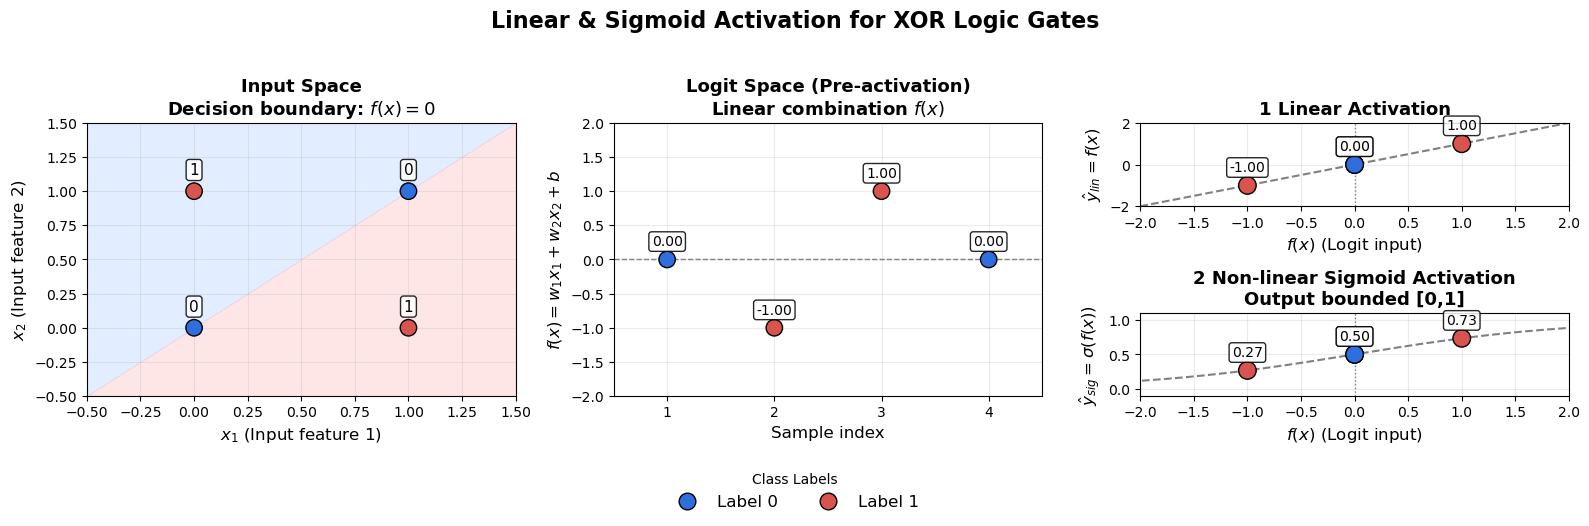

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

# ----- 1. Data -----
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR labels

# ----- 2. Linear model parameters -----
w = np.array([1.0, -1.0])
b = 0.0

def f(x):  # logit
    return np.dot(x, w) + b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))
# ----- 3. Compute -----
f_vals = f(X)

y_lin = f_vals
y_sig = sigmoid(f_vals)
# ----- 4. Layout -----

# Input grid for contour
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200),
                     np.linspace(-0.5, 1.5, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
f_grid = f(grid)

fig = plt.figure(figsize=(16, 5), constrained_layout=True)
fig.suptitle("Linear & Sigmoid Activation for XOR Logic Gates", fontsize=16, fontweight='bold')

gs = GridSpec(2, 3, figure=fig, width_ratios=[1, 1, 1], height_ratios=[1, 1])
cmap_bg = ListedColormap(['#a0c4ff', '#ffadad'])
cmap_pts = ListedColormap(['#2f6fdd', '#d9534f'])

# --- (1) Input Space ---
ax1 = fig.add_subplot(gs[:, 0])
cont = ax1.contourf(xx, yy, f_grid.reshape(xx.shape) > 0, alpha=0.3, cmap=cmap_bg)
sc1 = ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_pts, edgecolors='k', s=140, zorder=3)
for i, (x1, x2, label) in enumerate(zip(X[:,0], X[:,1], y)):
    ax1.annotate(f"{label}", (x1, x2), xytext=(0, 12), textcoords='offset points',
                 ha='center', fontsize=11, bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.85))
ax1.set_xlabel(r'$x_1$ (Input feature 1)', fontsize=12)
ax1.set_ylabel(r'$x_2$ (Input feature 2)', fontsize=12)
ax1.set_title('Input Space\nDecision boundary: $f(x)=0$', fontsize=13, fontweight='bold')
ax1.grid(alpha=0.25)
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)

# --- (2) Logit Space ---
ax2 = fig.add_subplot(gs[:, 1])
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
sc2 = ax2.scatter(np.arange(1, len(f_vals)+1), f_vals, c=y, cmap=cmap_pts, s=140, edgecolors='k', zorder=3)
for i, val in enumerate(f_vals):
    ax2.annotate(f"{val:.2f}", (i+1, val), xytext=(0, 10), textcoords='offset points',
                 ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.85))
ax2.set_xlabel('Sample index', fontsize=12)
ax2.set_ylabel(r'$f(x)=w_1x_1+w_2x_2+b$', fontsize=12)
ax2.set_title('Logit Space (Pre-activation)\nLinear combination $f(x)$', fontsize=13, fontweight='bold')
ax2.set_xticks([1,2,3,4])
ax2.grid(alpha=0.25)
ax2.set_xlim(0.5, 4.5)
ax2.set_ylim(min(f_vals)-1, max(f_vals)+1)

# --- (3-1) Linear Activation (Top right) ---
ax3 = fig.add_subplot(gs[0, 2])
z = np.linspace(-2, 2, 100)
ax3.plot(z, z, color='gray', linestyle='--', label=r'$y=z$ (linear)')
ax3.axvline(0, color='gray', linestyle=':', linewidth=1)
sc3 = ax3.scatter(f_vals, y_lin, c=y, cmap=cmap_pts, s=160, edgecolors='k', zorder=3)
for i in range(len(f_vals)):
    ax3.annotate(f"{y_lin[i]:.2f}", (f_vals[i], y_lin[i]), xytext=(0, 10), textcoords='offset points',
                 ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.85))
ax3.set_xlabel(r'$f(x)$ (Logit input)', fontsize=12)
ax3.set_ylabel(r'$\hat{y}_{lin}=f(x)$', fontsize=12)
ax3.set_title('1 Linear Activation', fontsize=13, fontweight='bold')
ax3.grid(alpha=0.25)
ax3.set_xlim(min(f_vals)-1, max(f_vals)+1)
ax3.set_ylim(min(y_lin)-1, max(y_lin)+1)

# --- (3-2) Nonlinear Sigmoid Activation (Bottom right) ---
ax4 = fig.add_subplot(gs[1, 2])
z = np.linspace(-6, 6, 400)
ax4.plot(z, sigmoid(z), color='gray', linestyle='--', label=r'$\sigma(f(x))$')
ax4.axvline(0, color='gray', linestyle=':', linewidth=1)
sc4 = ax4.scatter(f_vals, y_sig, c=y, cmap=cmap_pts, s=160, edgecolors='k', zorder=3)
for i in range(len(f_vals)):
    ax4.annotate(f"{y_sig[i]:.2f}", (f_vals[i], y_sig[i]), xytext=(0, 10), textcoords='offset points',
                 ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.85))
ax4.set_xlabel(r'$f(x)$ (Logit input)', fontsize=12)
ax4.set_ylabel(r'$\hat{y}_{sig}=\sigma(f(x))$', fontsize=12)
ax4.set_title('2 Non-linear Sigmoid Activation\nOutput bounded [0,1]', fontsize=13, fontweight='bold')
ax4.grid(alpha=0.25)
ax4.set_xlim(min(f_vals)-1, max(f_vals)+1)
ax4.set_ylim(-0.1, 1.1)

# ----- 5. Shared legend -----
# Create unified legend handles
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Label 0',
           markerfacecolor='#2f6fdd', markersize=12, markeredgecolor='k'),
    Line2D([0], [0], marker='o', color='w', label='Label 1',
           markerfacecolor='#d9534f', markersize=12, markeredgecolor='k')
]

fig.legend(handles=legend_elements,
           loc='lower center',
           ncol=2,
           frameon=False,
           fontsize=12,
           title='Class Labels',
           bbox_to_anchor=(0.5, -0.05))

plt.tight_layout(rect=[0,0.08,1,0.95])
plt.show()

In [41]:
gates

{'AND': (8, 8, -8.0), 'OR': (5, 5, -2.5), 'XOR': (8, 8, -16.0)}

/var/folders/y0/xmqglxpd07bcj0th06zn09nh0000gn/T/ipykernel_56735/962805611.py:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0,0.08,1,0.95])


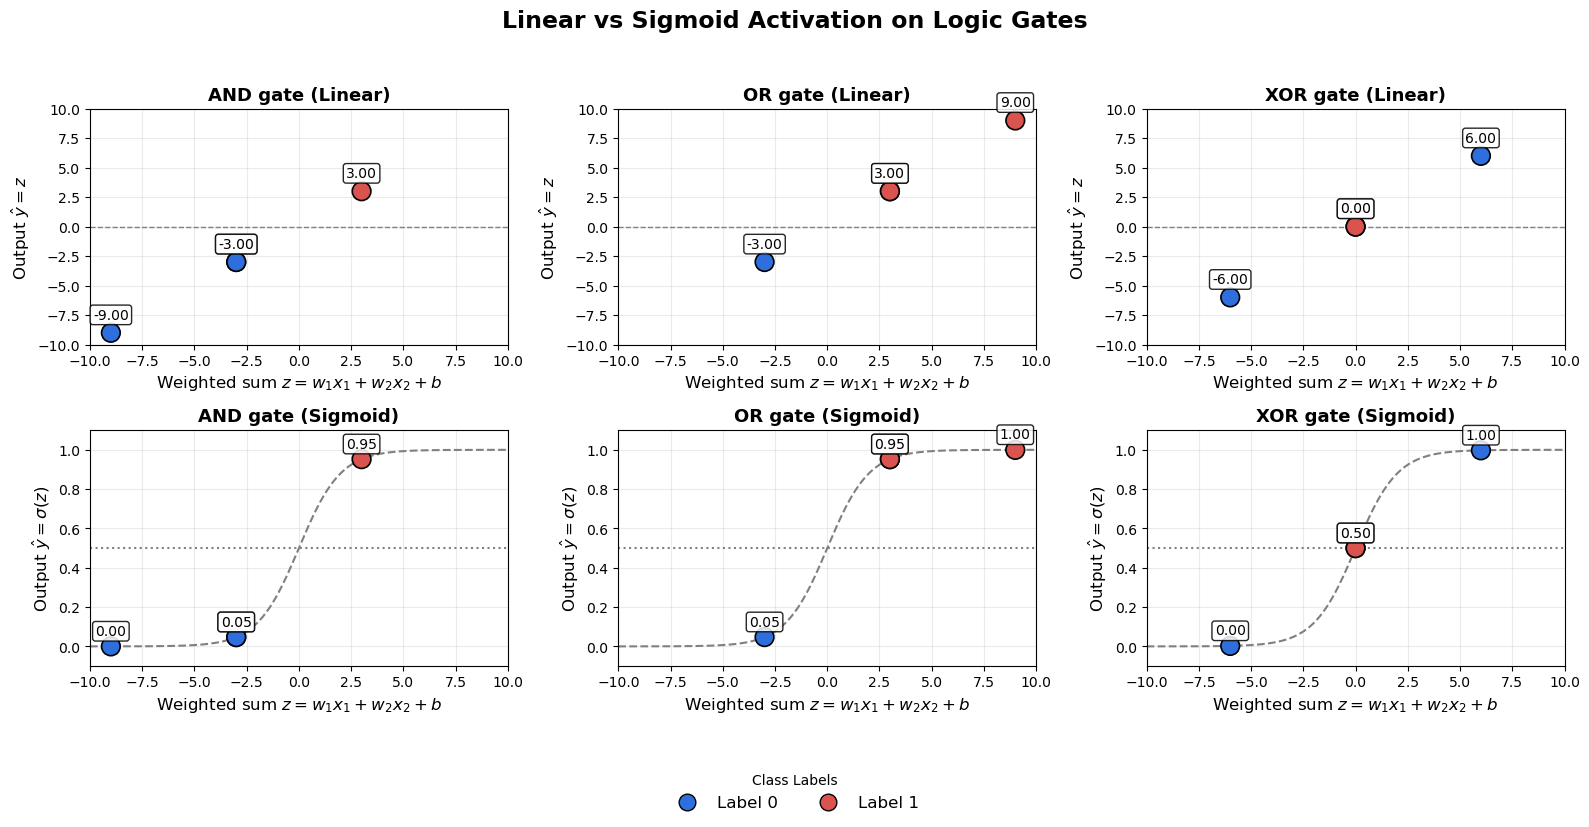

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# Activation functions
def linear(z):
    return z

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Input data (two binary inputs)
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
labels = {
    "AND": np.array([0,0,0,1]),
    "OR":  np.array([0,1,1,1]),
    "XOR": np.array([0,1,1,0])
}

# Tuned weights and bias for AND/OR to make sigmoid separable
gates = {
    "AND": (6.0, 6.0, -9.0),   # high threshold -> only (1,1) activates
    "OR":  (6.0, 6.0, -3.0),   # lower threshold -> any input=1 activates
    "XOR": (6.0, 6.0, -6.0)    # still non-separable
}
getes= gates

# Visual style
marker_props = dict(s=180, edgecolors='k', linewidths=1.2)
colors = ['#2f6fdd', '#d9534f']
cmap = ListedColormap(colors)

# Visualization layout
fig, axes = plt.subplots(2, 3, figsize=(16,8), constrained_layout=True)
fig.suptitle("Linear vs Sigmoid Activation on Logic Gates", fontsize=17, fontweight='bold')

for col, (name, (w1, w2, b)) in enumerate(gates.items()):
    true_labels = labels[name]

    # Compute linear and sigmoid outputs
    z_vals = w1*inputs[:,0] + w2*inputs[:,1] + b
    y_lin = linear(z_vals)
    y_sig = sigmoid(z_vals)

    # --- Linear plot (top row) ---
    ax_lin = axes[0, col]
    sc1 = ax_lin.scatter(z_vals, y_lin, c=true_labels, cmap=cmap, **marker_props, zorder=3)
    for zv, yv in zip(z_vals, y_lin):
        ax_lin.annotate(f"{yv:.2f}", (zv, yv), xytext=(0, 10), textcoords='offset points',
                        ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.85))
    ax_lin.axhline(0, color='gray', linestyle='--', linewidth=1)
    ax_lin.set_xlim(-10,10)
    ax_lin.set_ylim(-10,10)
    ax_lin.set_title(f"{name} gate (Linear)", fontsize=13, fontweight='bold')
    ax_lin.set_xlabel(r"Weighted sum $z = w_1x_1 + w_2x_2 + b$", fontsize=12)
    ax_lin.set_ylabel(r"Output $\hat{y} = z$", fontsize=12)
    ax_lin.grid(alpha=0.25)

    # --- Sigmoid plot (bottom row) ---
    ax_sig = axes[1, col]
    z_curve = np.linspace(-10,10,400)
    ax_sig.plot(z_curve, sigmoid(z_curve), color='gray', linestyle='--', label=r'$\sigma(z)$')
    sc2 = ax_sig.scatter(z_vals, y_sig, c=true_labels, cmap=cmap, **marker_props, zorder=3, label='Samples')
    for zv, yv in zip(z_vals, y_sig):
        ax_sig.annotate(f"{yv:.2f}", (zv, yv), xytext=(0, 8), textcoords='offset points',
                        ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.85))
    ax_sig.axhline(0.5, color='gray', linestyle=':')
    ax_sig.set_xlim(-10,10)
    ax_sig.set_ylim(-0.1,1.1)
    ax_sig.set_title(f"{name} gate (Sigmoid)", fontsize=13, fontweight='bold')
    ax_sig.set_xlabel(r"Weighted sum $z = w_1x_1 + w_2x_2 + b$", fontsize=12)
    ax_sig.set_ylabel(r"Output $\hat{y} = \sigma(z)$", fontsize=12)
    ax_sig.grid(alpha=0.25)

# Shared legend using custom handles
handles = [Line2D([0],[0], marker='o', color='w', label='Label 0',
                  markerfacecolor=colors[0], markersize=12, markeredgecolor='k'),
           Line2D([0],[0], marker='o', color='w', label='Label 1',
                  markerfacecolor=colors[1], markersize=12, markeredgecolor='k')]
fig.legend(handles=handles, loc='lower center', ncol=2, frameon=False, fontsize=12, title='Class Labels', bbox_to_anchor=(0.5, -0.04))

plt.tight_layout(rect=[0,0.08,1,0.95])
plt.show()

In [43]:
gates

{'AND': (6.0, 6.0, -9.0), 'OR': (6.0, 6.0, -3.0), 'XOR': (6.0, 6.0, -6.0)}

/var/folders/y0/xmqglxpd07bcj0th06zn09nh0000gn/T/ipykernel_56735/1824497940.py:127: UserWarning: The figure layout has changed to tight
  plt.tight_layout(rect=[0,0.08,1,0.95])


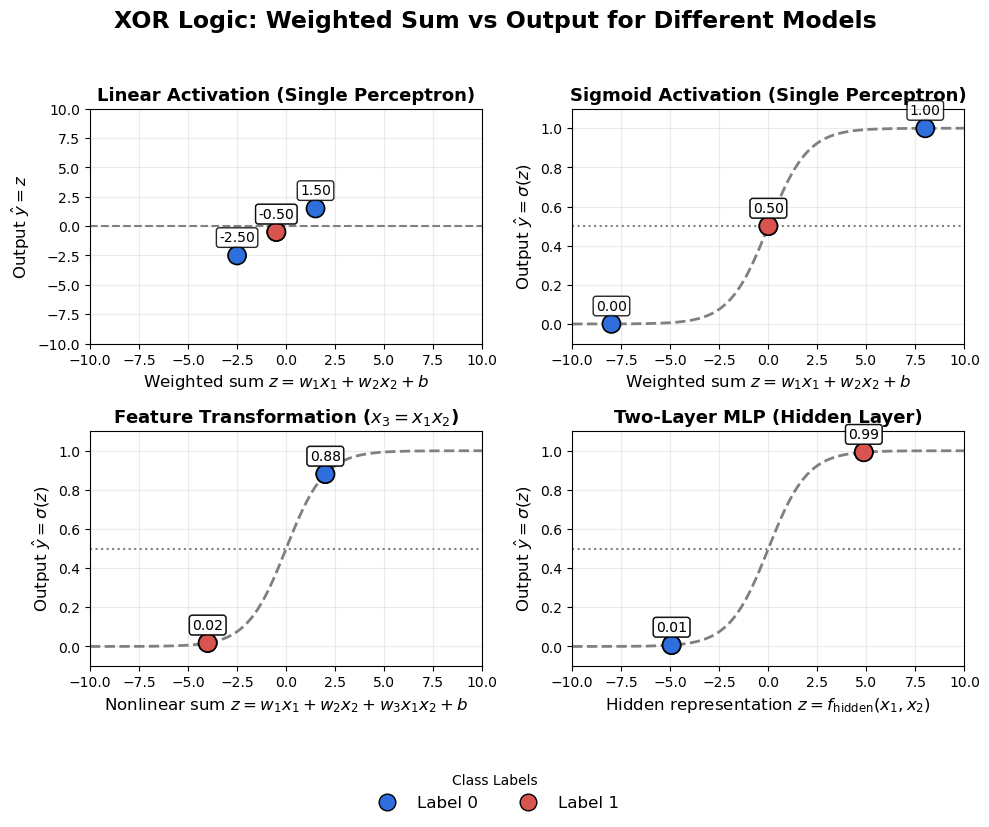

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

# --- Activation functions ---
def sigmoid(z): 
    return 1 / (1 + np.exp(-z))

def linear(z):
    return z

# --- XOR dataset ---
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# ---- 1. Linear Perceptron ----
def linear_model(X):
    w1, w2, b = 2, 2, -2.5
    z = w1*X[:,0] + w2*X[:,1] + b
    return z, linear(z)

# ---- 2. Sigmoid Perceptron ----
def sigmoid_model(X):
    w1, w2, b = 8, 8, -8
    z = w1*X[:,0] + w2*X[:,1] + b
    return z, sigmoid(z)

# ---- 3. Feature Transformation (x3 = x1*x2) ----
def feature_model(X):
    x1, x2 = X[:,0], X[:,1]
    x3 = x1 * x2
    w = np.array([-6.0, -6.0, 12.0])
    b = 2
    z = w[0]*x1 + w[1]*x2 + w[2]*x3 + b
    return z, sigmoid(z)

# ---- 4. Two-layer MLP ----
def mlp_model(X):
    # Hidden layer
    w_hidden = np.array([[10.0, -10.0],
                         [10.0, -10.0]])
    b_hidden = np.array([-5.0, 15.0])
    z_hidden = np.dot(X, w_hidden) + b_hidden
    a_hidden = sigmoid(z_hidden)
    # Output layer
    w_out = np.array([[10.0], [10.0]])
    b_out = -15.0
    z_out = np.dot(a_hidden, w_out) + b_out
    return z_out.flatten(), sigmoid(z_out).flatten()

# Compute all results
z1, y1_hat = linear_model(X)
z2, y2_hat = sigmoid_model(X)
z3, y3_hat = feature_model(X)
z4, y4_hat = mlp_model(X)

# -----------------------------------------------------------
# Plot setup
# -----------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)
fig.suptitle("XOR Logic: Weighted Sum vs Output for Different Models", fontsize=17, fontweight='bold')

titles = [
    "Linear Activation (Single Perceptron)",
    "Sigmoid Activation (Single Perceptron)",
    "Feature Transformation ($x_3 = x_1x_2$)",
    "Two-Layer MLP (Hidden Layer)"
 ]

# x-axis labels (mathematically accurate)
xlabels = [
    r"Weighted sum $z = w_1x_1 + w_2x_2 + b$",
    r"Weighted sum $z = w_1x_1 + w_2x_2 + b$",
    r"Nonlinear sum $z = w_1x_1 + w_2x_2 + w_3x_1x_2 + b$",
    r"Hidden representation $z = f_{\text{hidden}}(x_1,x_2)$"
 ]

Z_all = [z1, z2, z3, z4]
Y_all = [y1_hat, y2_hat, y3_hat, y4_hat]

# Smooth sigmoid for reference
z_curve = np.linspace(-10, 10, 400)
sig_curve = sigmoid(z_curve)

colors = ['#2f6fdd', '#d9534f']
marker_props = dict(s=170, edgecolors='k', linewidths=1.2)
cmap = ListedColormap(colors)

# -----------------------------------------------------------
# Draw each subplot
# -----------------------------------------------------------
for i, (ax, z_vals, y_hat, title) in enumerate(zip(axes.ravel(), Z_all, Y_all, titles)):
    # Sigmoid curve for nonlinear cases
    if np.all((y_hat >= 0) & (y_hat <= 1)):
        ax.plot(z_curve, sig_curve, color='gray', linestyle='--', linewidth=2, label=r'$\sigma(z)$')
        ax.axhline(0.5, color='gray', linestyle=':')
        ax.set_ylim(-0.1, 1.1)
        ax.set_ylabel(r"Output $\hat{y} = \sigma(z)$", fontsize=12)
    else:
        ax.axhline(0, color='gray', linestyle='--')
        ax.set_ylim(-10, 10)
        ax.set_ylabel(r"Output $\hat{y} = z$", fontsize=12)
    
    # Sample points
    sc = ax.scatter(z_vals, y_hat, c=y, cmap=cmap, **marker_props, zorder=3)
    
    # Annotate predicted values
    for xv, yv in zip(z_vals, y_hat):
        ax.annotate(f"{yv:.2f}", (xv, yv), xytext=(0, 10), textcoords='offset points',
                    ha='center', fontsize=10, bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.85))
    
    ax.set_xlabel(xlabels[i], fontsize=12)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.grid(alpha=0.25)
    ax.set_xlim(-10, 10)

# -----------------------------------------------------------
# Shared legend
# -----------------------------------------------------------
handles = [Line2D([0],[0], marker='o', color='w', label='Label 0',
                  markerfacecolor=colors[0], markersize=12, markeredgecolor='k'),
           Line2D([0],[0], marker='o', color='w', label='Label 1',
                  markerfacecolor=colors[1], markersize=12, markeredgecolor='k')]
fig.legend(handles=handles, loc='lower center', ncol=2, frameon=False, fontsize=12, title='Class Labels', bbox_to_anchor=(0.5, -0.04))

plt.tight_layout(rect=[0,0.08,1,0.95])
plt.show()

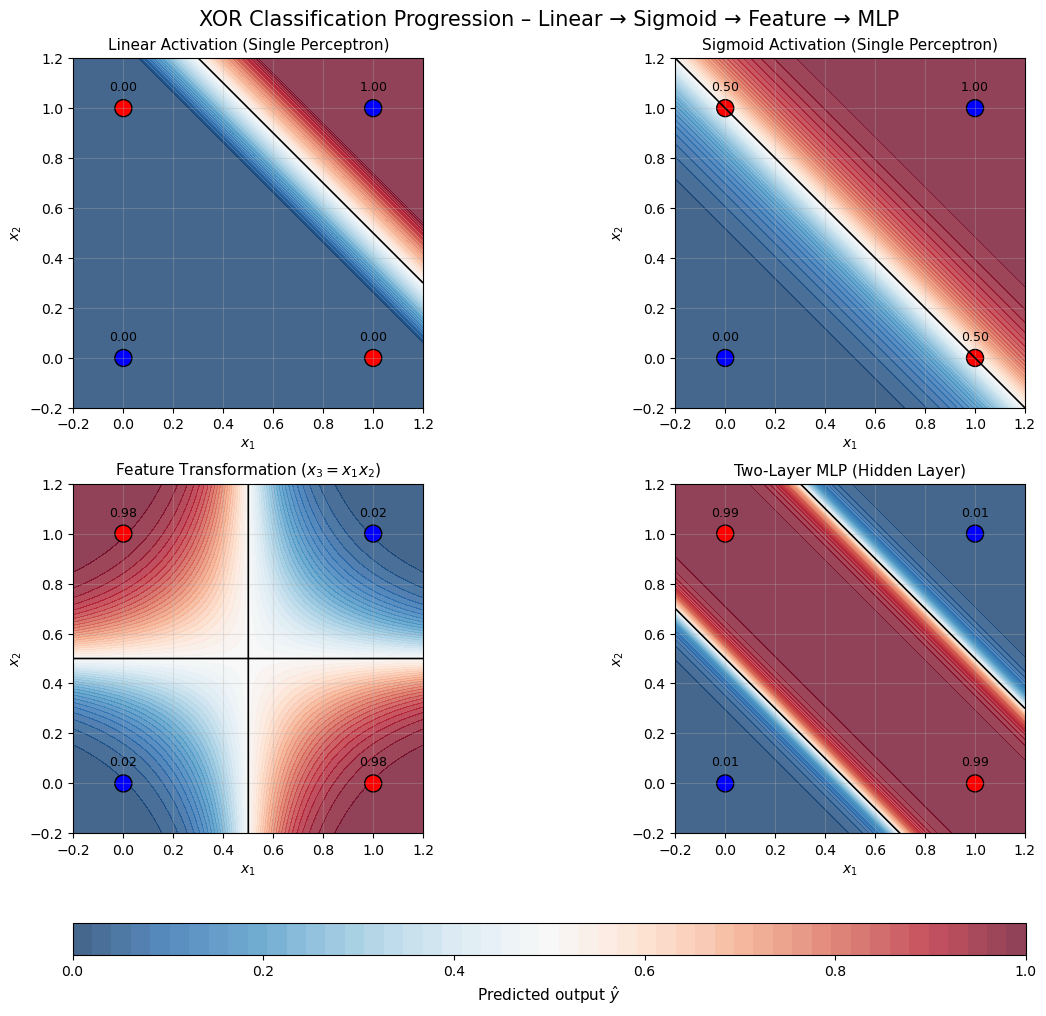

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Activation -----
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ----- XOR Data -----
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Mesh grid for contour visualization
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 200),
                     np.linspace(-0.2, 1.2, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

# -----------------------------------------------------------
# 1. Linear Perceptron
# -----------------------------------------------------------
def linear_model(X):
    w1, w2, b = 2, 2, -2.5
    z = w1 * X[:,0] + w2 * X[:,1] + b
    return np.clip(z, 0, 1)  # Clip to [0,1] for consistent visualization

Z1 = linear_model(grid).reshape(xx.shape)
y1 = linear_model(X)

# -----------------------------------------------------------
# 2. Sigmoid Perceptron
# -----------------------------------------------------------
def sigmoid_model(X):
    w1, w2, b = 8, 8, -8
    z = w1 * X[:,0] + w2 * X[:,1] + b
    return sigmoid(z)

Z2 = sigmoid_model(grid).reshape(xx.shape)
y2 = sigmoid_model(X)

# -----------------------------------------------------------
# 3. Feature Transformation (x3 = x1*x2)
# -----------------------------------------------------------
def feature_model(X):
    x1, x2 = X[:,0], X[:,1]
    x3 = x1 * x2
    w = np.array([8.0, 8.0, -16.0])  # Fixed weights for better XOR approximation
    b = -4.0
    z = w[0]*x1 + w[1]*x2 + w[2]*x3 + b
    return sigmoid(z)

Z3 = feature_model(grid).reshape(xx.shape)
y3 = feature_model(X)

# -----------------------------------------------------------
# 4. Two-Layer MLP
# -----------------------------------------------------------
def mlp_model(X):
    w_hidden = np.array([[10.0, -10.0],
                         [10.0, -10.0]])
    b_hidden = np.array([-5.0, 15.0])
    z_h = np.dot(X, w_hidden) + b_hidden
    a_h = sigmoid(z_h)
    w_out = np.array([[10.0], [10.0]])
    b_out = -15.0
    z_out = np.dot(a_h, w_out) + b_out
    return sigmoid(z_out).flatten()

Z4 = mlp_model(grid).reshape(xx.shape)
y4 = mlp_model(X)

# -----------------------------------------------------------
# Plot all models (2×2) - SAME FORMAT
# -----------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12,10), constrained_layout=True)
fig.suptitle("XOR Classification Progression – Linear → Sigmoid → Feature → MLP", fontsize=15)
titles = [
    "Linear Activation (Single Perceptron)",
    "Sigmoid Activation (Single Perceptron)",
    "Feature Transformation ($x_3=x_1x_2$)",
    "Two-Layer MLP (Hidden Layer)"
]
Z_list = [Z1, Z2, Z3, Z4]
Y_preds = [y1, y2, y3, y4]

for ax, Z, preds, title in zip(axes.ravel(), Z_list, Y_preds, titles):
    # Background contour - ALL CLIPPED TO [0,1]
    cs = ax.contourf(xx, yy, Z, levels=np.linspace(0,1,50), cmap="RdBu_r", alpha=0.75)
    ax.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=1.2)

    # Scatter points with class color
    sc = ax.scatter(X[:,0], X[:,1], c=y, cmap="bwr", edgecolors='k', s=150)
    
    # Annotate each data point with prediction value
    for (x1, x2, yp) in zip(X[:,0], X[:,1], preds):
        ax.text(x1, x2 + 0.07, f"{yp:.2f}", ha='center', fontsize=9, color='black')

    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    ax.set_aspect('equal')
    ax.set_title(title, fontsize=11)
    ax.grid(alpha=0.3)

# -----------------------------------------------------------
# LEGEND BY 0.2 INTERVALS ONLY
# -----------------------------------------------------------
cb = fig.colorbar(cs, ax=axes.ravel().tolist(), orientation='horizontal', 
                  shrink=0.8, pad=0.05, aspect=30)
cb.set_label(r"Predicted output $\hat{y}$", fontsize=11)
cb.set_ticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])  # Only 0.2 intervals

plt.show()

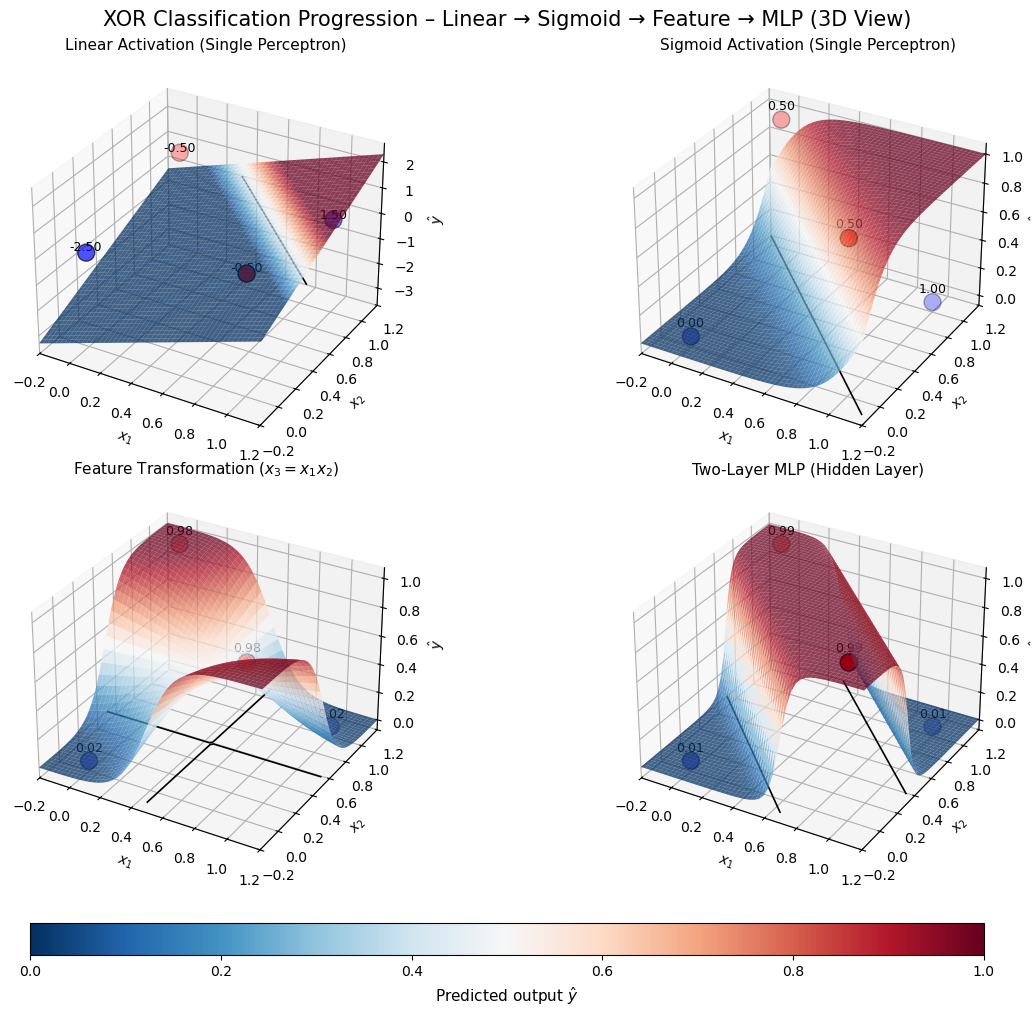

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

# ----- Activation -----
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ----- XOR Data -----
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# Mesh grid for surface visualization
xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 50),  # Reduced resolution for 3D performance
                     np.linspace(-0.2, 1.2, 50))
grid = np.c_[xx.ravel(), yy.ravel()]

# -----------------------------------------------------------
# 1. Linear Perceptron
# -----------------------------------------------------------
def linear_model(X):
    w1, w2, b = 2, 2, -2.5
    z = w1 * X[:,0] + w2 * X[:,1] + b
    return z

Z1 = linear_model(grid).reshape(xx.shape)
y1 = linear_model(X)

# -----------------------------------------------------------
# 2. Sigmoid Perceptron
# -----------------------------------------------------------
def sigmoid_model(X):
    w1, w2, b = 8, 8, -8
    z = w1 * X[:,0] + w2 * X[:,1] + b
    return sigmoid(z)

Z2 = sigmoid_model(grid).reshape(xx.shape)
y2 = sigmoid_model(X)

# -----------------------------------------------------------
# 3. Feature Transformation (x3 = x1*x2)
# -----------------------------------------------------------
def feature_model(X):
    x1, x2 = X[:,0], X[:,1]
    x3 = x1 * x2
    w = np.array([8.0, 8.0, -16.0])  # Fixed weights to correctly approximate XOR
    b = -4.0
    z = w[0]*x1 + w[1]*x2 + w[2]*x3 + b
    return sigmoid(z)

Z3 = feature_model(grid).reshape(xx.shape)
y3 = feature_model(X)

# -----------------------------------------------------------
# 4. Two-Layer MLP
# -----------------------------------------------------------
def mlp_model(X):
    w_hidden = np.array([[10.0, -10.0],
                         [10.0, -10.0]])
    b_hidden = np.array([-5.0, 15.0])
    z_h = np.dot(X, w_hidden) + b_hidden
    a_h = sigmoid(z_h)
    w_out = np.array([[10.0], [10.0]])
    b_out = -15.0
    z_out = np.dot(a_h, w_out) + b_out
    return sigmoid(z_out).flatten()

Z4 = mlp_model(grid).reshape(xx.shape)
y4 = mlp_model(X)

# -----------------------------------------------------------
# Plot all models in 3D (2×2)
# -----------------------------------------------------------
fig, axes = plt.subplots(2, 2, figsize=(12,10), 
                         subplot_kw={'projection': '3d'}, 
                         constrained_layout=True)
fig.suptitle("XOR Classification Progression – Linear → Sigmoid → Feature → MLP (3D View)", fontsize=15)
titles = [
    "Linear Activation (Single Perceptron)",
    "Sigmoid Activation (Single Perceptron)",
    "Feature Transformation ($x_3=x_1 x_2$)",
    "Two-Layer MLP (Hidden Layer)"
]
Z_list = [Z1, Z2, Z3, Z4]
Y_preds = [y1, y2, y3, y4]

for ax, Z, preds, title in zip(axes.ravel(), Z_list, Y_preds, titles):
    # Surface plot with color mapping clipped to [0,1]
    surf = ax.plot_surface(xx, yy, Z, cmap="RdBu_r", alpha=0.75, 
                           vmin=0, vmax=1, rstride=1, cstride=1)
    
    # Projected decision boundary contour at \hat{y}=0.5 on z=0 plane
    ax.contour(xx, yy, Z, levels=[0.5], zdir='z', offset=0, 
               colors='k', linewidths=1.2)

    # Scatter true labels as points at (x1, x2, y)
    ax.scatter(X[:,0], X[:,1], y, c=y, cmap="bwr", edgecolors='k', s=150)
    
    # Annotate each data point with prediction value near the true y position
    for (x1, x2, yp, truey) in zip(X[:,0], X[:,1], preds, y):
        ax.text(x1, x2, truey + 0.07, f"{yp:.2f}", ha='center', fontsize=9, color='black')

    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.set_zlabel(r"$\hat{y}$")
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.2, 1.2)
    ax.set_title(title, fontsize=11)

# -----------------------------------------------------------
# Shared colorbar legend (forced to [0,1] range)
# -----------------------------------------------------------
sm = ScalarMappable(cmap="RdBu_r", norm=plt.Normalize(0, 1))
cb = fig.colorbar(sm, ax=axes.ravel().tolist(), orientation='horizontal', 
                  shrink=0.8, pad=0.05, aspect=30)
cb.set_label(r"Predicted output $\hat{y}$", fontsize=11)

plt.show()

## Why a single-layer perceptron cannot learn XOR?

---
###  What a single-layer perceptron does

A **perceptron** computes
$
y = f(\mathbf{w}^\top \mathbf{x} + b)
$

where

* $\mathbf{x} = (x_1, x_2)$ is the input vector,
* $\mathbf{w}$ is the weight vector,
* $b$ is the bias,
* $f$ is a step or threshold function: it outputs 1 if the weighted sum exceeds 0, otherwise 0.

Geometrically, this is just a **linear classifier** — it divides the input space with a straight line (in higher dimensions, a hyperplane).

---

### What XOR looks like

The XOR truth table for two inputs:

| x₁ | x₂ | y = XOR(x₁, x₂) |
| -- | -- | --------------- |
| 0  | 0  | 0               |
| 0  | 1  | 1               |
| 1  | 0  | 1               |
| 1  | 1  | 0               |

Plot those four points in a 2D plane:

* (0,0) → 0
* (0,1) → 1
* (1,0) → 1
* (1,1) → 0


---

### Proof by contradiction (linear separability argument)

A perceptron works only if there exists a weight vector $\mathbf{w} = (w_1, w_2)$ and bias $b$ such that:

$$
\begin{cases}
w_1x_1 + w_2x_2 + b > 0 & \text{for } y=1 \\

w_1x_1 + w_2x_2 + b < 0 & \text{for } y=0
\end{cases}
$$

Substitute the four XOR points:

$$
\begin{cases}
b < 0 & \text{for } (0,0)\rightarrow 0 \\
w_2 + b > 0 & \text{for } (0,1)\rightarrow 1 \\
w_1 + b > 0 & \text{for } (1,0)\rightarrow 1 \\
w_1 + w_2 + b < 0 & \text{for } (1,1)\rightarrow 0
\end{cases}
$$

Now check if these inequalities can be satisfied simultaneously.

From the first three:

* $ b < 0 $
* $ w_1 > -b $
* $ w_2 > -b $

Add the last inequality:

* $ w_1 + w_2 + b < 0 $

But if $ w_1 > -b $ and $w_2 > -b$, then $w_1 + w_2 + b > -b - b + b = -b$, which is **positive**, contradicting $w_1 + w_2 + b < 0$.

Therefore, no solution exists.

That’s the mathematical nail in the coffin — **no single linear boundary** can satisfy all four conditions.

In [47]:
import numpy as np

# 입력 데이터
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [48]:
# 임의의 초기 가중치
weights = np.random.rand(2, 2)
weights

array([[0.21931014, 0.58566766],
       [0.76211501, 0.90111707]])

In [49]:
# 가중치 계산 예시
weighted_inputs = np.dot(X, weights)
weighted_inputs

array([[0.        , 0.        ],
       [0.76211501, 0.90111707],
       [0.21931014, 0.58566766],
       [0.98142515, 1.48678473]])

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 활성화 함수 적용
activated_output = sigmoid(weighted_inputs)

In [51]:
# 최종 출력 값
output = activated_output
print("출력 값:", output)

출력 값: [[0.5        0.5       ]
 [0.68181275 0.71117901]
 [0.55460883 0.64237049]
 [0.72739091 0.81559519]]


In [52]:
# 실제 값 (예: XOR 문제)
y = np.array([[0], [1], [1], [0]])

# 오차 계산
error = y - output

# 가중치 조정 (간단한 예: 경사 하강법)
learning_rate = 0.1
adjustments = learning_rate * np.dot(X.T, error * (output * (1 - output)))
weights += adjustments

print("조정된 가중치:", weights)

조정된 가중치: [[0.21588842 0.58161698]
 [0.75459421 0.89478303]]
